# Plant Disease classification using ResNET

Use the "Run" button to execute the code.

In [204]:
!pip install jovian --upgrade --quiet

In [205]:
import jovian

In [206]:
# Execute this to save new versions of the notebook
jovian.commit(project="project-plant-disease")

[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
Committed successfully! https://jovian.ai/tayyabkhan298/project-plant-disease


'https://jovian.ai/tayyabkhan298/project-plant-disease'

# Our Goal

###Goal is clear and simple. We need to build a model, which can classify between healthy and diseased crop leaves and also if the crop have any disease, predict which disease is it.

##Importing necessary libraries



In [207]:
!pip install torchsummary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [208]:
!pip install opendatasets --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [209]:
import os                                           #for working with files
import numpy as np                                  #for numerical computations
import pandas as pd                                 # for working with dataframes
import torch                                        # Pytorch module 
import matplotlib.pyplot as plt                     # for plotting informations on graph and images using tensors
import torch.nn as nn                               # for creating  neural networks
from torch.utils.data import DataLoader       # for Dataloaders
from PIL import Image                               # for checking images
import torch.nn.functional as F                     # for functions for calculating loss                    
import torchvision.transforms as transforms         # for transforming images into tensors 
from torchvision.utils import make_grid             # for data checking
from torchvision.datasets import ImageFolder        # for working with classes and images
from torchsummary import summary                    # for getting the summary of our model
import opendatasets as od
%matplotlib inline

#Exploring the Data

In [210]:
dataset_url = 'https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset'
od.download(dataset_url)

Skipping, found downloaded files in "./new-plant-diseases-dataset" (use force=True to force download)


In [211]:
data_dir = './new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)'
train_dir = data_dir + "/train"
validation_dir = data_dir + "/valid"
diseases = os.listdir(train_dir)

In [212]:
print(diseases)

['Orange___Haunglongbing_(Citrus_greening)', 'Apple___healthy', 'Tomato___Bacterial_spot', 'Potato___healthy', 'Soybean___healthy', 'Pepper,_bell___healthy', 'Corn_(maize)___Common_rust_', 'Tomato___Leaf_Mold', 'Potato___Early_blight', 'Tomato___Late_blight', 'Grape___Esca_(Black_Measles)', 'Tomato___Septoria_leaf_spot', 'Tomato___Target_Spot', 'Tomato___Tomato_mosaic_virus', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Blueberry___healthy', 'Squash___Powdery_mildew', 'Apple___Black_rot', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Raspberry___healthy', 'Grape___Black_rot', 'Corn_(maize)___healthy', 'Peach___Bacterial_spot', 'Apple___Apple_scab', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Peach___healthy', 'Strawberry___healthy', 'Apple___Cedar_apple_rust', 'Grape___healthy', 'Tomato___Early_blight', 'Corn_(maize)___Northern_Leaf_Blight', 'Pepper,_bell___Bacterial_spot', 'Tomato___healthy', 'Potato___Late_blight', 'Cherry_(i

In [213]:
print("Total Diseases : {} ".format(len(diseases)))

Total Diseases : 38 


Extracting unique plants and unique dieseases

In [214]:
plants=[]
Number_of_Disease= 0
for plant in diseases:
  if plant.split('___')[0] not in plants:
    plants.append(plant.split('___')[0])
  if plant.split('___')[1] != 'healthy':
    Number_of_Disease+= 1

In [215]:
#unique plants 
print(f"Unique Plants : \n{plants}")
print("\n")
print("Number of unique plants: {}\n".format(len(plants)))

Unique Plants : 
['Orange', 'Apple', 'Tomato', 'Potato', 'Soybean', 'Pepper,_bell', 'Corn_(maize)', 'Grape', 'Blueberry', 'Squash', 'Raspberry', 'Peach', 'Strawberry', 'Cherry_(including_sour)']


Number of unique plants: 14



In [216]:
print("Number of Unique Diseases: {}".format(Number_of_Disease))

Number of Unique Diseases: 26


Number of Images per disease Class

In [217]:
nums= {}
for disease in diseases:
  nums[disease] = len(os.listdir(train_dir + '/' + disease))

img_per_Class = pd.DataFrame(nums.values() , index = nums.keys(),columns=["no. of images"])
img_per_Class

no. of images
Orange___Haunglongbing_(Citrus_greening)                     2010
Apple___healthy                                              2008
Tomato___Bacterial_spot                                      1702
Potato___healthy                                             1824
Soybean___healthy                                            2022
Pepper,_bell___healthy                                       1988
Corn_(maize)___Common_rust_                                  1907
Tomato___Leaf_Mold                                           1882
Potato___Early_blight                                        1939
Tomato___Late_blight                                         1851
Grape___Esca_(Black_Measles)                                 1920
Tomato___Septoria_leaf_spot                                  1745
Tomato___Target_Spot                                         1827
Tomato___Tomato_mosaic_virus                                 1790
Tomato___Spider_mites Two-spotted_spider_mite                1741
Blueberry___healthy                                          1816
Squash___Powdery_mildew                                      1736
Apple___Black_rot                                            1987
Tomato___Tomato_Yellow_Leaf_Curl_Virus                       1961
Grape___Leaf_blight_(Isariopsis_Leaf_Spot)                   1722
Raspberry___healthy                                          1781
Grape___Black_rot                                            1888
Corn_(maize)___healthy                                       1859
Peach___Bacterial_spot                                       1838
Apple___Apple_scab                                           2016
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot           1642
Peach___healthy                                              1728
Strawberry___healthy                                         1824
Apple___Cedar_apple_rust                                     1760
Grape___healthy                                              1692
Tomato___Early_blight                                        1920
Corn_(maize)___Northern_Leaf_Blight                          1908
Pepper,_bell___Bacterial_spot                                1913
Tomato___healthy                                             1926
Potato___Late_blight                                         1939
Cherry_(including_sour)___healthy                            1826
Cherry_(including_sour)___Powdery_mildew                     1683
Strawberry___Leaf_scorch                                     1774

Visualising information through graphs for finding balancing in Data

Text(0.5, 1.0, 'Images per each class of plant disease')

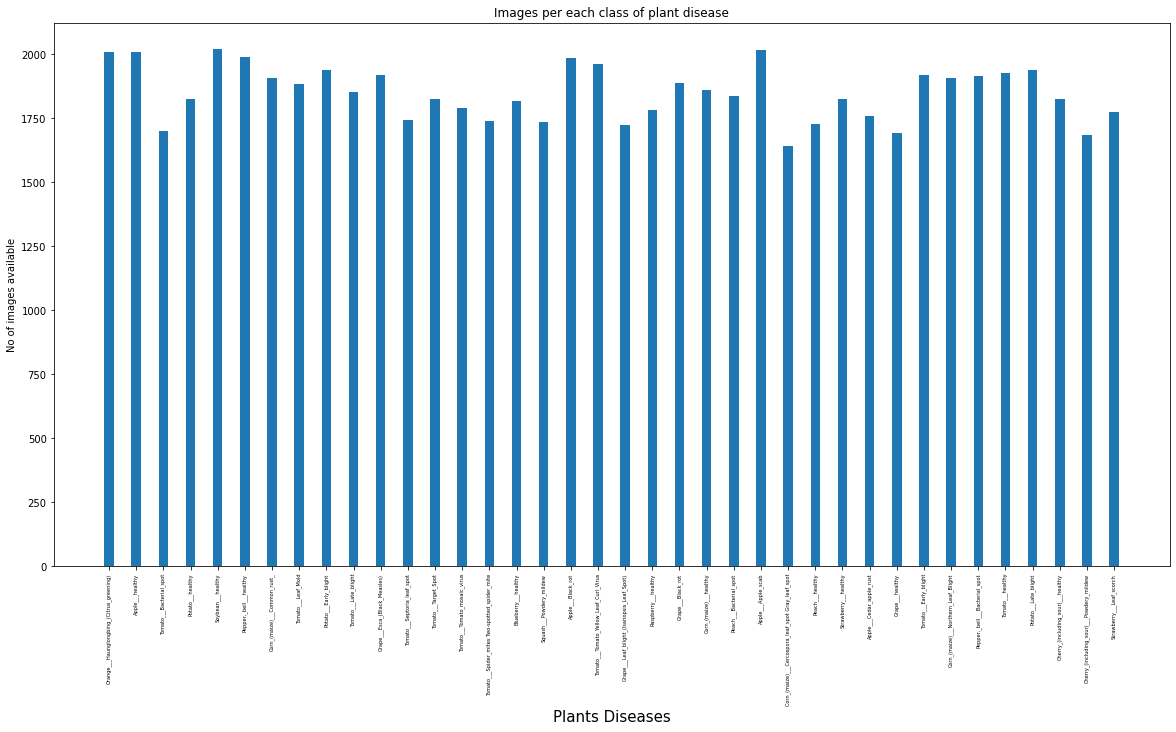

In [218]:
#plotting images for each disease
index = [ n for n in range(38)]
plt.figure(figsize=(20,10))
plt.bar(index, [n for n in nums.values()],width=0.35)
plt.xlabel('Plants Diseases',fontsize=15)
plt.ylabel('No of images available' , fontsize=10)
plt.xticks(index, diseases, fontsize=5, rotation=90)
plt.title('Images per each class of plant disease')

dataset looks almost balanced, so we are good to go.

In [219]:
n_train = 0
for value in nums.values():
    n_train += value
print(f"There are {n_train} images for training")

There are 70295 images for training


# Data preparation for training

In [220]:
train=ImageFolder(train_dir, transform= transforms.ToTensor())
validation=ImageFolder(validation_dir, transform= transforms.ToTensor())

torchvision.datasets is a class which helps in loading all common and famous datasets. It also helps in loading custom datasets. I have used subclass torchvision.datasets.ImageFolder which helps in loading the image data when the data is arranged in this way:

root/abc/xxx.png

root/abc/xxy.png

root/abc/xxz.png



Image Shape

In [221]:
img,label = train[0]
print(img.shape,label)

torch.Size([3, 256, 256]) 0


We can see the shape (3, 256 256) of the image. 3 is the number of channels (RGB) and 256 x 256 is the width and height of the image

In [222]:
#for checking some images
def show_image(image,label):
  print("label :"+train.classes[label]+"(" + str(label) + ")")

  plt.imshow(image.permute(1,2,0))

label :Apple___Apple_scab(0)


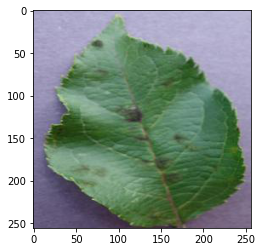

In [223]:
show_image(*train[0])

label :Apple___Apple_scab(0)


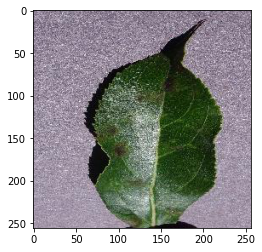

In [224]:
show_image(*train[500])

label :Apple___Black_rot(1)


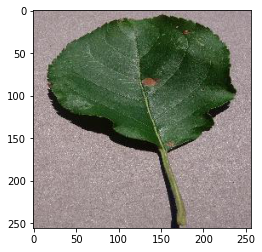

In [225]:
show_image(*train[3000])

label :Peach___Bacterial_spot(16)


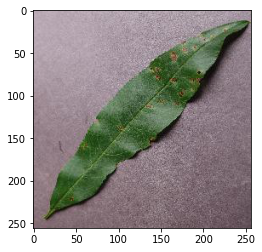

In [226]:
show_image(*train[30000])

In [227]:
random_seed=8
torch.manual_seed(random_seed)
batch_size=30

In [228]:
#dataloader for training and validation
train_dl=DataLoader(train,batch_size,shuffle=True,num_workers=2,pin_memory=True)
valid_dl=DataLoader(validation,batch_size,num_workers=2,pin_memory=True)


* DataLoader is a subclass which comes from torch.utils.data. It helps in loading large and memory consuming datasets. It takes in batch_size which denotes the number of samples contained in each generated batch.

* Setting shuffle=True shuffles the 
dataset. It is heplful so that batches between epochs do not look alike. Doing so will eventually make our model more robust.

* num_workers, denotes the number of processes that generate batches in parallel. If you have more cores in your CPU, you can set it to number of cores in your CPU. 

In [229]:
def show_batch(data):
  for images, labels in data:
    fig,ax =plt.subplots(figsize=(40,40))
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(make_grid(images,nrow=7).permute(1,2,0))
    break

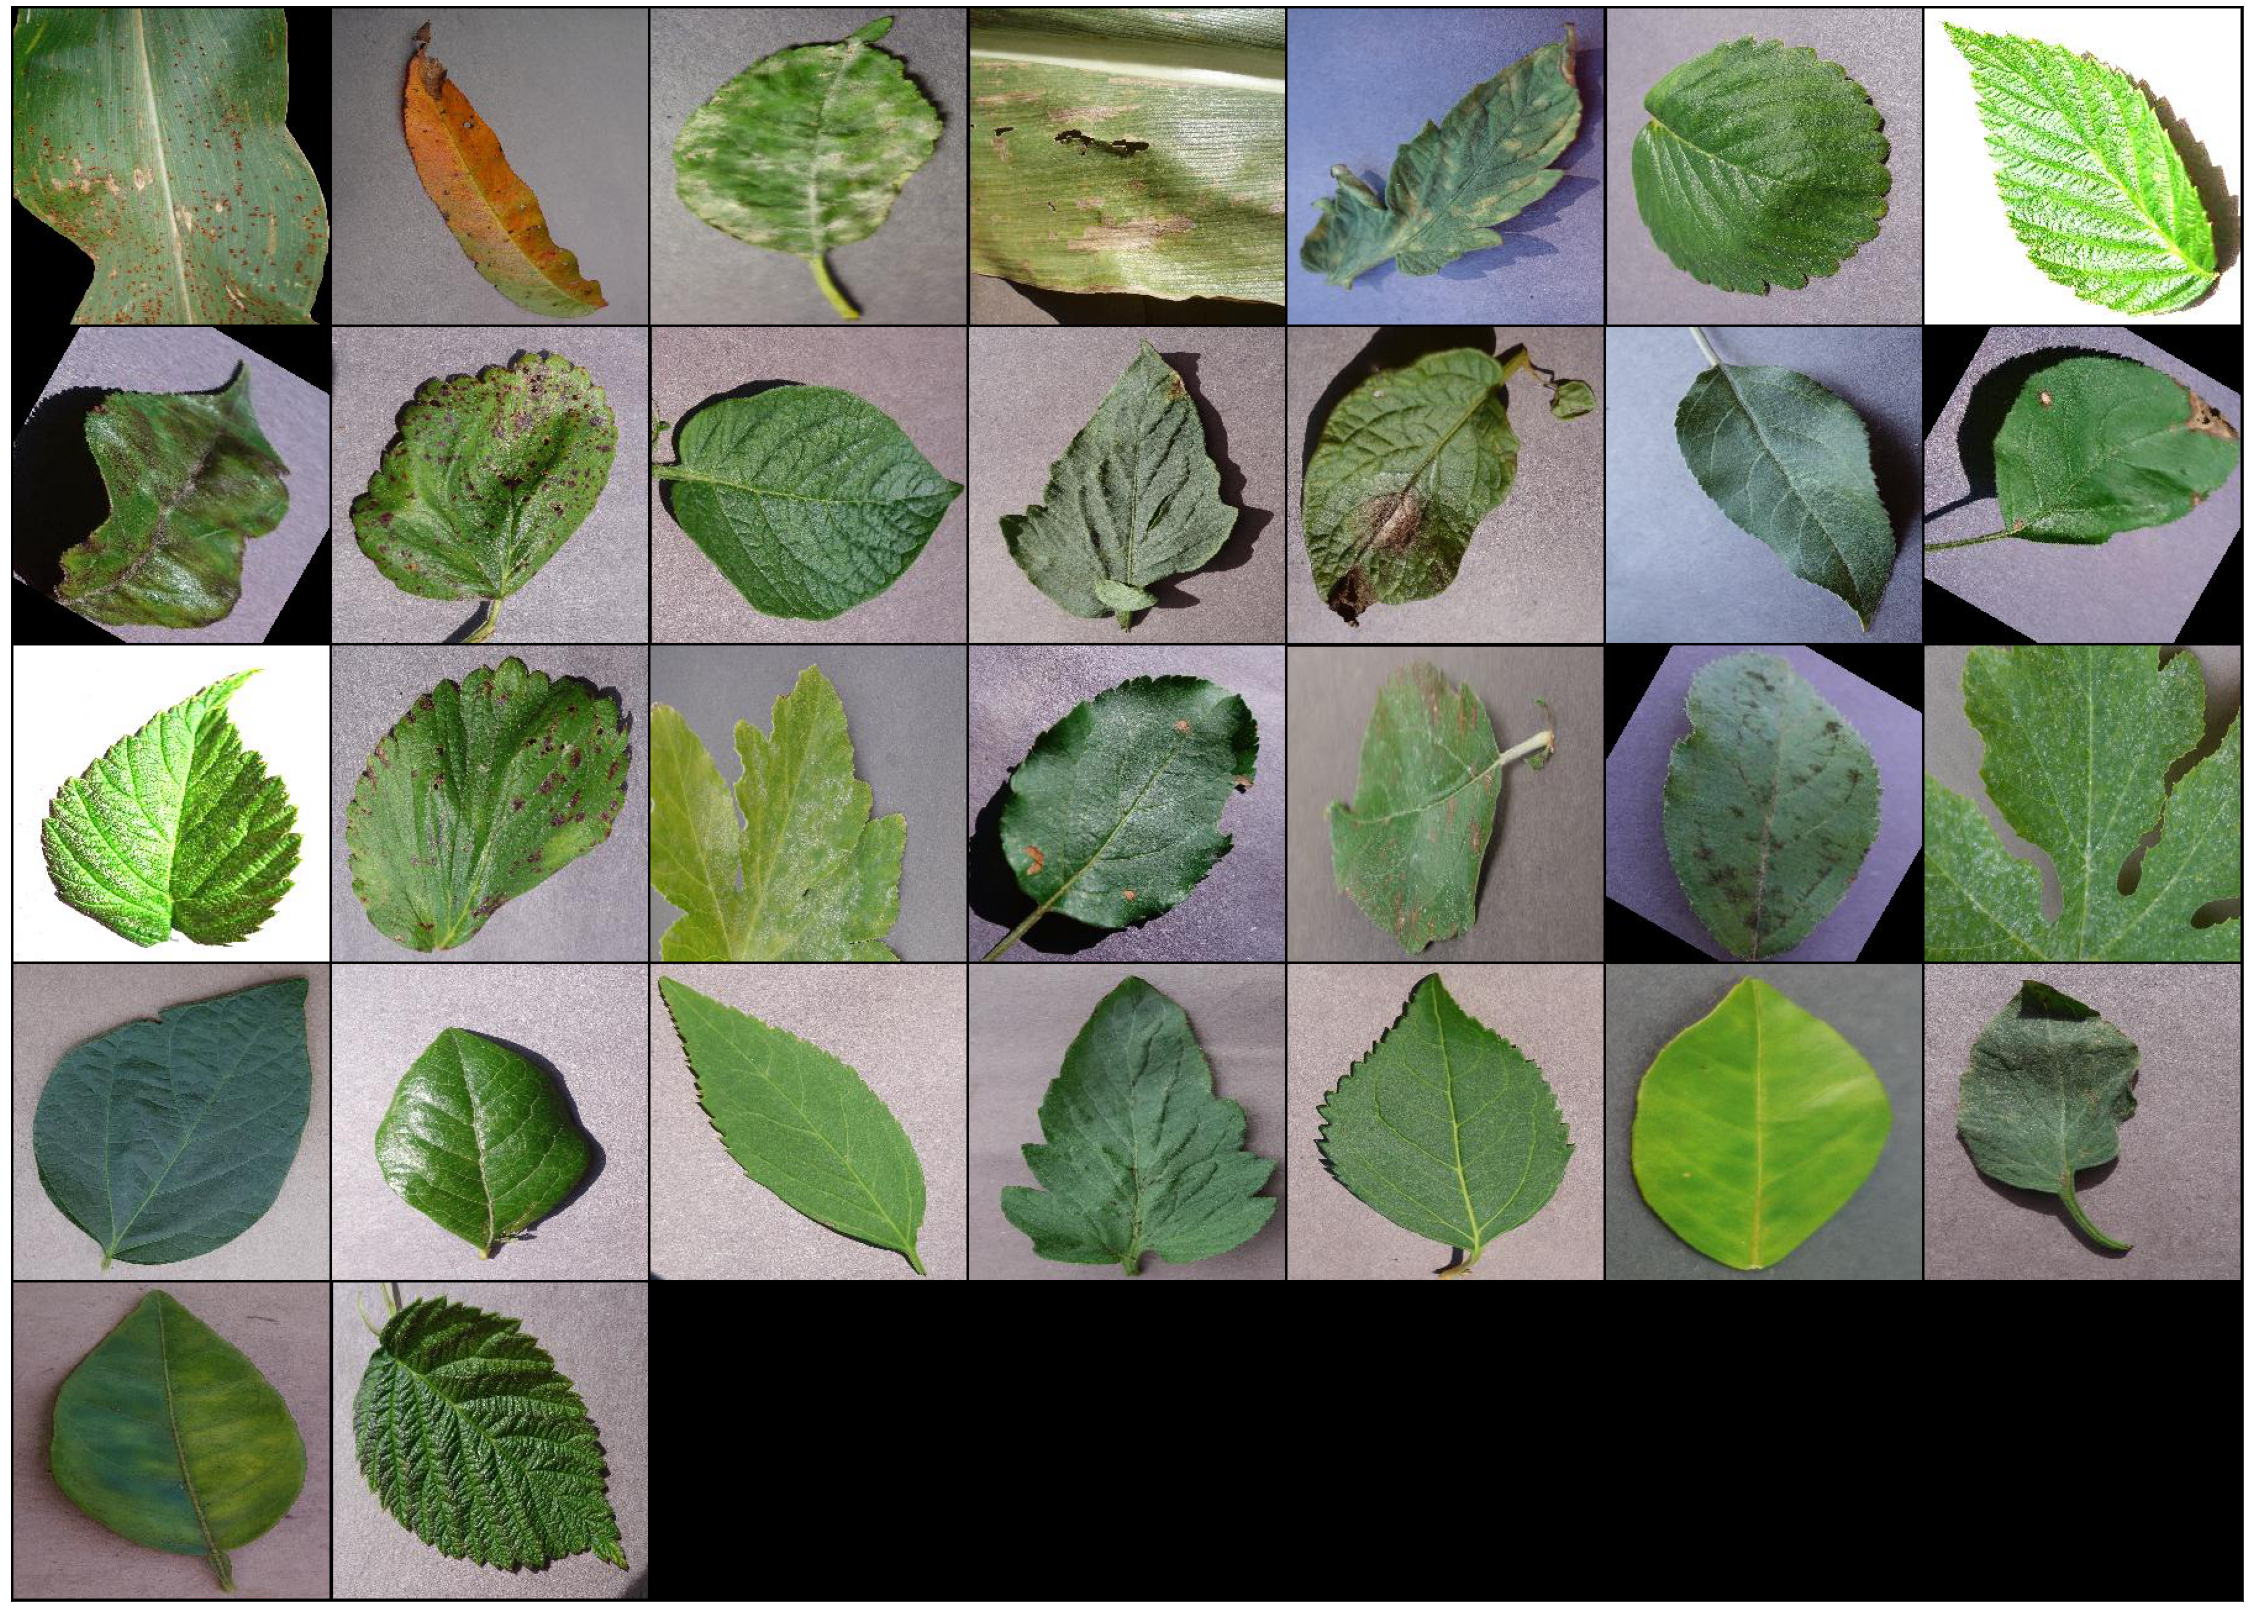

In [230]:
show_batch(train_dl)

## Modelling 


defining some helper functions



In [231]:
# for moving data into GPU (if available)
def get_default_device():
    """Pick GPU if available, else CPU"""
    if torch.cuda.is_available:
        return torch.device("cuda")
    else:
        return torch.device("cpu")

# for moving data to device (CPU or GPU)
def to_device(data, device):
    """Move tensor(s) to chosen device"""
    if isinstance(data, (list,tuple)):
        return [to_device(x, device) for x in data]
    return data.to(device, non_blocking=True)

# for loading in the device (GPU if available else CPU)
class DeviceDataLoader():
    """Wrap a dataloader to move data to a device"""
    def __init__(self, dl, device):
        self.dl = dl
        self.device = device
        
    def __iter__(self):
        """Yield a batch of data after moving it to device"""
        for b in self.dl:
            yield to_device(b, self.device)
        
    def __len__(self):
        """Number of batches"""
        return len(self.dl)

Checking for GPU

In [232]:
device=get_default_device()
device

device(type='cuda')

In [233]:
#Moving Data to GPU

train_dl=DeviceDataLoader(train_dl,device)
valid_dl=DeviceDataLoader(valid_dl,device)


#Building the architeture of model

we are using Resnet which is introduced in 2015.

If you want to learn more about ResNets read the following articles:

* [Understanding and Visualizing ResNets](https://towardsdatascience.com/understanding-and-visualizing-resnets-442284831be8#:~:text=ResNet%20Layers,layers%20remains%20the%20same%20%E2%80%94%204.)
* [Overview of ResNet and its variants](https://towardsdatascience.com/an-overview-of-resnet-and-its-variants-5281e2f56035)
* [Paper with code implementation](https://paperswithcode.com/method/**resnet**)

## Model with Residual Blocks and Batch Normalization

* Resudial block, which adds the original input back to the output feature map obtained by passing the input through one or more convolutional layers.

![](https://miro.medium.com/max/1140/1*D0F3UitQ2l5Q0Ak-tjEdJg.png)

Here is a very simple Residual block:


Here is a very simple Residual block:

In [234]:
class SimpleResidualBlock(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu1 = nn.ReLU()
        self.conv2 = nn.Conv2d(in_channels=3, out_channels=3, kernel_size=3, stride=1, padding=1)
        self.relu2 = nn.ReLU()
        
    def forward(self, x):
        out = self.conv1(x)
        out = self.relu1(out)
        out = self.conv2(out)
        return self.relu2(out) + x # ReLU can be applied before or after adding the input

In [235]:
simple_resnet = to_device(SimpleResidualBlock(), device)

for images, labels in train_dl:
    out = simple_resnet(images)
    print(out.shape)
    break
    
del simple_resnet, images, labels
torch.cuda.empty_cache()

torch.Size([30, 3, 256, 256])


This seeming small change produces a drastic improvement in the performance of the model. Also, after each convolutional layer, we'll add a batch normalization layer, which normalizes the outputs of the previous layer. 

Go through the following blog posts to learn more:

* Why and how residual blocks work: https://towardsdatascience.com/residual-blocks-building-blocks-of-resnet-fd90ca15d6ec
* Batch normalization and dropout explained: https://towardsdatascience.com/batch-normalization-and-dropout-in-neural-networks-explained-with-pytorch-47d7a8459bcd

We will use the ResNet9 architecture, as described in [this blog series](https://www.myrtle.ai/2018/09/24/how_to_train_your_resnet/) :

![resnet-9](https://github.com/lambdal/cifar10-fast/raw/master/net.svg?sanitize=true)

In [244]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

class ImageClassificationBase(nn.Module):
    def training_step(self, batch):
        images, labels = batch 
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss
    
    def validation_step(self, batch):
        images, labels = batch 
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss.detach(), 'val_acc': acc}
        
    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}
    
    def epoch_end(self, epoch, result):
        print("Epoch [{}], last_lr: {:.5f}, train_loss: {:.4f}, val_loss: {:.4f}, val_acc: {:.4f}".format(
            epoch, result['lrs'][-1], result['train_loss'], result['val_loss'], result['val_acc']))

# Defining final architecture of our model

In [237]:
# Convulution block with BatchNormalization

def conv_block(in_channels, out_channels,pool=False):
  layers=[nn.Conv2d(in_channels, out_channels, kernel_size=3, padding=1),
          nn.BatchNorm2d(out_channels),
          nn.ReLU(inplace=True)]
  if pool:
    layers.append(nn.MaxPool2d(4))
  return nn.Sequential(*layers)

#resnet Architecture

class ResNet9(ImageClassificationBase):
    def __init__(self, in_channels, Number_of_Disease):
        super().__init__()
        
        self.conv1 = conv_block(in_channels, 64)
        self.conv2 = conv_block(64, 128, pool=True)
        self.res1 = nn.Sequential(conv_block(128, 128), conv_block(128, 128))
        
        self.conv3 = conv_block(128, 256, pool=True)
        self.conv4 = conv_block(256, 512, pool=True)
        self.res2 = nn.Sequential(conv_block(512, 512), conv_block(512, 512))
        
        self.classifier = nn.Sequential(nn.MaxPool2d(4), 
                                        nn.Flatten(), 
                                        nn.Linear(512, Number_of_Disease))
        
    def forward(self, xb):
        out = self.conv1(xb)
        out = self.conv2(out)
        out = self.res1(out) + out
        out = self.conv3(out)
        out = self.conv4(out)
        out = self.res2(out) + out
        out = self.classifier(out)
        return out

Now, we define a model object and transfer it into the device with which we are working...

In [238]:
#defining the model and moving it to GPU
model=to_device(ResNet9(3,len(train.classes)),device)
model

ResNet9(
  (conv1): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (conv2): Sequential(
    (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  )
  (res1): Sequential(
    (0): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
    )
    (1): Sequential(
      (0): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=Tr

In [239]:
#getting summary of model
Input_shape=(3,256,256)
print(summary(model.cuda(),(Input_shape)))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 64, 256, 256]           1,792
       BatchNorm2d-2         [-1, 64, 256, 256]             128
              ReLU-3         [-1, 64, 256, 256]               0
            Conv2d-4        [-1, 128, 256, 256]          73,856
       BatchNorm2d-5        [-1, 128, 256, 256]             256
              ReLU-6        [-1, 128, 256, 256]               0
         MaxPool2d-7          [-1, 128, 64, 64]               0
            Conv2d-8          [-1, 128, 64, 64]         147,584
       BatchNorm2d-9          [-1, 128, 64, 64]             256
             ReLU-10          [-1, 128, 64, 64]               0
           Conv2d-11          [-1, 128, 64, 64]         147,584
      BatchNorm2d-12          [-1, 128, 64, 64]             256
             ReLU-13          [-1, 128, 64, 64]               0
           Conv2d-14          [-1, 256,

## Training the model

Before we train the model, we're going to make a bunch of small but important improvements to our `fit` function:

* **Learning rate scheduling**: Instead of using a fixed learning rate, we will use a learning rate scheduler, which will change the learning rate after every batch of training. There are many strategies for varying the learning rate during training, and the one we'll use is called the **"One Cycle Learning Rate Policy"**, which involves starting with a low learning rate, gradually increasing it batch-by-batch to a high learning rate for about 30% of epochs, then gradually decreasing it to a very low value for the remaining epochs. Learn more: https://sgugger.github.io/the-1cycle-policy.html

* **Weight decay**: We also use weight decay, which is yet another regularization technique which prevents the weights from becoming too large by adding an additional term to the loss function.Learn more: https://towardsdatascience.com/this-thing-called-weight-decay-a7cd4bcfccab

* **Gradient clipping**: Apart from the layer weights and outputs, it also helpful to limit the values of gradients to a small range to prevent undesirable changes in parameters due to large gradient values. This simple yet effective technique is called gradient clipping. Learn more: https://towardsdatascience.com/what-is-gradient-clipping-b8e815cdfb48


Let's define a `fit_one_cycle` function to incorporate these changes. We'll also record the learning rate used for each batch.

In [240]:
@torch.no_grad()
def evaluate(model, val_loader):
    model.eval()
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

def get_lr(optimizer):
    for param_group in optimizer.param_groups:
        return param_group['lr']

def fit_one_cycle(epochs, max_lr, model, train_loader, val_loader, 
                  weight_decay=0, grad_clip=None, opt_func=torch.optim.SGD):
    torch.cuda.empty_cache()
    history = []
    
    # Set up cutom optimizer with weight decay
    optimizer = opt_func(model.parameters(), max_lr, weight_decay=weight_decay)
    # Set up one-cycle learning rate scheduler
    sched = torch.optim.lr_scheduler.OneCycleLR(optimizer, max_lr, epochs=epochs, 
                                                steps_per_epoch=len(train_loader))
    
    for epoch in range(epochs):
        # Training Phase 
        model.train()
        train_losses = []
        lrs = []
        for batch in train_loader:
            loss = model.training_step(batch)
            train_losses.append(loss)
            loss.backward()
            
            # Gradient clipping
            if grad_clip: 
                nn.utils.clip_grad_value_(model.parameters(), grad_clip)
            
            optimizer.step()
            optimizer.zero_grad()
            
            # Record & update learning rate
            lrs.append(get_lr(optimizer))
            sched.step()
        
        # Validation phase
        result = evaluate(model, val_loader)
        result['train_loss'] = torch.stack(train_losses).mean().item()
        result['lrs'] = lrs
        model.epoch_end(epoch, result)
        history.append(result)
    return history

In [241]:
torch.cuda.empty_cache()
history= [evaluate(model,valid_dl)]
history

[{'val_acc': 0.02633674629032612, 'val_loss': 3.6389079093933105}]

We're now ready to train our model. Instead of SGD (stochastic gradient descent), we'll use the Adam optimizer which uses techniques like momentum and adaptive learning rates for faster training. You can learn more about optimizers here: https://ruder.io/optimizing-gradient-descent/index.html

In [245]:
epochs = 3
max_lr = 0.01
grad_clip = 0.1
weight_decay = 1e-4
opt_func = torch.optim.Adam

In [246]:

history += fit_one_cycle(epochs, max_lr, model, train_dl , valid_dl, 
                         grad_clip=grad_clip,
                         weight_decay=1e-4,
                         opt_func=opt_func)

Epoch [0], last_lr: 0.00994, train_loss: 0.7282, val_loss: 1.3126, val_acc: 0.6536
Epoch [1], last_lr: 0.00463, train_loss: 0.2751, val_loss: 0.1733, val_acc: 0.9431
Epoch [2], last_lr: 0.00000, train_loss: 0.0677, val_loss: 0.0246, val_acc: 0.9929


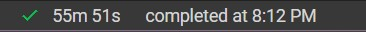

Training time

In [247]:
train_time = '55:51'

Our model trained to over 99.2% accuracy!


##Plotting

helper functions for plotting

In [248]:
def plot_accuracies(history):
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');

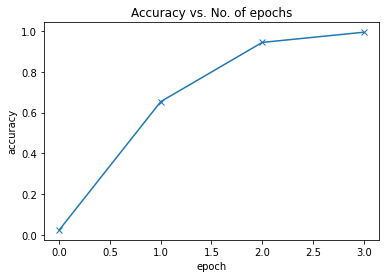

In [249]:
plot_accuracies(history)

We can also plot the training and validation losses to study the trend.

In [251]:
def plot_losses(history):
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

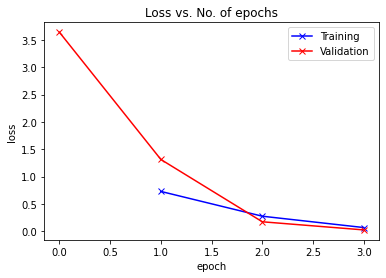

In [252]:
plot_losses(history)


It's clear from the trend that our model isn't overfitting to the training data just yet.


In [258]:
def plot_lrs(history):
  lr= np.concatenate([x.get('lrs', []) for x in history])
  plt.plot(lr)
  plt.xlabel('Batch no.')
  plt.ylabel('Learning Rate')
  plt.title('learning Rate vs Batch no.');


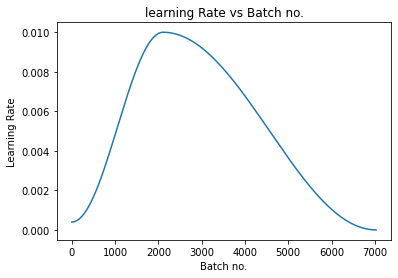

In [259]:
plot_lrs(history)

# Testing with individual images

We only have 33 images in test data, so let's check the model on all images

In [273]:
test_dir = './new-plant-diseases-dataset/test'
test = ImageFolder(test_dir, transform=transforms.ToTensor())

In [274]:
test_images=sorted(os.listdir(test_dir + '/test'))
test_images

['AppleCedarRust1.JPG',
 'AppleCedarRust2.JPG',
 'AppleCedarRust3.JPG',
 'AppleCedarRust4.JPG',
 'AppleScab1.JPG',
 'AppleScab2.JPG',
 'AppleScab3.JPG',
 'CornCommonRust1.JPG',
 'CornCommonRust2.JPG',
 'CornCommonRust3.JPG',
 'PotatoEarlyBlight1.JPG',
 'PotatoEarlyBlight2.JPG',
 'PotatoEarlyBlight3.JPG',
 'PotatoEarlyBlight4.JPG',
 'PotatoEarlyBlight5.JPG',
 'PotatoHealthy1.JPG',
 'PotatoHealthy2.JPG',
 'TomatoEarlyBlight1.JPG',
 'TomatoEarlyBlight2.JPG',
 'TomatoEarlyBlight3.JPG',
 'TomatoEarlyBlight4.JPG',
 'TomatoEarlyBlight5.JPG',
 'TomatoEarlyBlight6.JPG',
 'TomatoHealthy1.JPG',
 'TomatoHealthy2.JPG',
 'TomatoHealthy3.JPG',
 'TomatoHealthy4.JPG',
 'TomatoYellowCurlVirus1.JPG',
 'TomatoYellowCurlVirus2.JPG',
 'TomatoYellowCurlVirus3.JPG',
 'TomatoYellowCurlVirus4.JPG',
 'TomatoYellowCurlVirus5.JPG',
 'TomatoYellowCurlVirus6.JPG']

In [275]:
def predict_image(img, model):
    """Converts image to array and return the predicted class
        with highest probability"""
    # Convert to a batch of 1
    xb = to_device(img.unsqueeze(0), device)
    # Get predictions from model
    yb = model(xb)
    # Pick index with highest probability
    _, preds  = torch.max(yb, dim=1)
    # Retrieve the class label

    return train.classes[preds[0].item()]

Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust


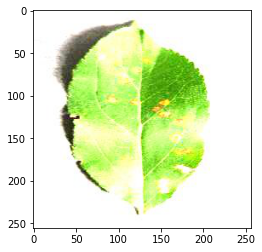

In [276]:
# predicting first image
img, label = test[0]
plt.imshow(img.permute(1, 2, 0))
print('Label:', test_images[0], ', Predicted:', predict_image(img, model))


In [277]:
# getting all predictions (actual label vs predicted)
for i, (img, label) in enumerate(test):
    print('Label:', test_images[i], ', Predicted:', predict_image(img, model))

Label: AppleCedarRust1.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust2.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust3.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleCedarRust4.JPG , Predicted: Apple___Cedar_apple_rust
Label: AppleScab1.JPG , Predicted: Apple___Apple_scab
Label: AppleScab2.JPG , Predicted: Apple___Apple_scab
Label: AppleScab3.JPG , Predicted: Apple___Apple_scab
Label: CornCommonRust1.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust2.JPG , Predicted: Corn_(maize)___Common_rust_
Label: CornCommonRust3.JPG , Predicted: Corn_(maize)___Common_rust_
Label: PotatoEarlyBlight1.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight2.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight3.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight4.JPG , Predicted: Potato___Early_blight
Label: PotatoEarlyBlight5.JPG , Predicted: Potato___Early_blight
Label: PotatoHealthy1.JPG , Predicted: Potato___h

Our model predicated all the test images perfectly!

#Save and Commit
Let's save the weights of the model, record the hyperparameters, and commit our experiment to Jovian. 

In [278]:
torch.save(model.state_dict(),'plant_disease-resnet9.pth')

In [279]:
!pip install jovian --upgrade --quiet

In [280]:
import jovian

In [281]:
jovian.reset()
jovian.log_hyperparams(arch='resnet9', 
                       epochs=epochs, 
                       lr=max_lr, 
                       scheduler='one-cycle', 
                       weight_decay=weight_decay, 
                       grad_clip=grad_clip,
                       opt=opt_func.__name__)

[jovian] Hyperparams logged.


In [282]:
jovian.log_metrics(val_loss=history[-1]['val_loss'], 
                   val_acc=history[-1]['val_acc'],
                   train_loss=history[-1]['train_loss'],
                   time=train_time)

[jovian] Metrics logged.


In [286]:
jovian.commit(project="project-plant-disease", environment=None, outputs=['plant_disease-resnet9.pth'])


[jovian] Detected Colab notebook...
[jovian] Uploading colab notebook to Jovian...
[jovian] Uploading additional outputs...
[jovian] Attaching records (metrics, hyperparameters, dataset etc.)
Committed successfully! https://jovian.ai/tayyabkhan298/project-plant-disease


'https://jovian.ai/tayyabkhan298/project-plant-disease'

#Conclusion

Resnet architeture perform significantly well for this image classification dataset
while some of the parameters are optimized and techniques like scheduling learning rate,gradient clipping and weight deacay are applied.This model is able to predict every image in test dataset perfectly as we achieved 99.2% accuracy.

#References
* CIFAR10 ResNet Implementation
* PyTorch docs